# Data Generation

In [1]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 46.1 MB/s eta 0:00:00


In [2]:
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import math

In [3]:
df = pd.read_csv("city_coordinates.csv")

In [4]:
df

,City,Latitude,Longitude
0,"Indira Gandhi International Airport ,Delhi",28.555168,77.084737
1,"Taj Mahal, Agra",27.175007,78.042101
2,"Taj Hotel,Maharashtra",18.921778,72.833285
3,"Agra Fort, UP",27.179826,78.020822
4,"Red Fort, Delhi",28.656081,77.240796
5,"Hawa Mahal, Jaipur",26.923932,75.826865
6,"Amer Fort, Jaipur",26.985475,75.853973
7,"Stok Kangri, Ladakh",33.986291,77.442149
8,"Nubra Valley, Ladakh",33.983834,77.817666
9,"Nohkalikai Falls, Cherrapunji",25.277734,91.729242


In [5]:
df.isnull().sum()

City         0
Latitude     0
Longitude    0
dtype: int64

In [6]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    d_lat = lat2 - lat1
    d_lon = lon2 - lon1
    a = math.sin(d_lat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(d_lon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 6371 * c  # Earth's radius in kilometers

    return distance

# Sample DataFrame with latitude and longitude columns
# Replace this DataFrame with your own data
city_df = df

# Calculate distance matrix using Haversine formula
distance_matrix = {}
for i, row1 in city_df.iterrows():
    distance_matrix[row1['City']] = {}
    for j, row2 in city_df.iterrows():
        distance_matrix[row1['City']][row2['City']] = haversine_distance(row1['Latitude'], row1['Longitude'],
                                                                         row2['Latitude'], row2['Longitude'])

# Convert the distance matrix to a DataFrame
df_distance = pd.DataFrame.from_dict(distance_matrix, orient='index')

# Print the distance matrix
print(df_distance)


                                            Indira Gandhi International Airport ,Delhi  \
Indira Gandhi International Airport ,Delhi                                    0.000000   
Taj Mahal, Agra                                                             180.022403   
Taj Hotel,Maharashtra                                                      1154.984644   
Agra Fort, UP                                                               178.477545   
Red Fort, Delhi                                                              18.921140   
Hawa Mahal, Jaipur                                                          219.598605   
Amer Fort, Jaipur                                                           212.429656   
Stok Kangri, Ladakh                                                         604.866428   
Nubra Valley, Ladakh                                                        607.639784   
Nohkalikai Falls, Cherrapunji                                              1495.892174   
Nanda Devi

In [7]:
distance=df_distance.T

In [8]:
# A handful of sites
sites=[
    'Indira Gandhi International Airport ,Delhi',
    'Taj Mahal, Agra',
    'Taj Hotel,Maharashtra',
     'Agra Fort, UP',
    'Red Fort, Delhi',
    'Hawa Mahal, Jaipur ',
    'Amer Fort, Jaipur',
    'Stok Kangri, Ladakh',
    'Nubra Valley, Ladakh',
    'Nohkalikai Falls, Cherrapunji',
    'Nanda Devi, Uttarakhand',
    'Kargil',
    'Andaman And Nicobar Islands',
    'Khajjiar, Himachal Pradesh',
    'Himachal Pradesh',
    'Dal Lake',
    'Valley Of Flowers, Uttaranchal',
    'Pangong Tso, Leh Ladakh',
    'Ghats, Varanasi',
    'Sand Dunes, Jaisalmer',
    'Lake Pichola, Udaipur',
    'Dudhsagar Falls, Goa',
    'Agatti Island, Lakshadweep',
    'Munnar, Kerala',
    'Manali',
    'Raigad',
    'Ladakh',
    'Tawang, Arunachal Pradesh',
    'Uttrakhand',
    'Chilka Lake, Odisha',
    'Agumbe, Karnataka',
    'Rann Of Kutch',
    'Loktak Lake, Manipur',
    'Caves, Meghalaya',
    'Palolem Beach, Goa',
    'Tamil Nadu',
    'Bhedaghat, Madhya Pradesh',
    'Lonar Crater, Maharashtra',
    'Gulmarg, Jammu And Kashmir',
    'Andhra Pradesh',
    'Karnataka',
    'Maharashtra',
    'Chembra Peak, Wayanad, Kerala',
    'Lonavala',
    'Mumbai, Maharashtra',
    'Jaipur, Rajasthan',
    'Mahabaleshwar',
    'Ooty'
]
pos = ['Latitude', 'Longitude']
position = pd.read_csv('city_coordinates.csv', index_col="City")
#flighttime = pd.read_csv('flight_time.csv', index_col="City")
distance.head(5)
position.head(5)

,Latitude,Longitude
City,,
"Indira Gandhi International Airport ,Delhi",28.555168,77.084737
"Taj Mahal, Agra",27.175007,78.042101
"Taj Hotel,Maharashtra",18.921778,72.833285
"Agra Fort, UP",27.179826,78.020822
"Red Fort, Delhi",28.656081,77.240796


In [9]:
distance.head(5)

,"Indira Gandhi International Airport ,Delhi","Taj Mahal, Agra","Taj Hotel,Maharashtra","Agra Fort, UP","Red Fort, Delhi","Hawa Mahal, Jaipur","Amer Fort, Jaipur","Stok Kangri, Ladakh","Nubra Valley, Ladakh","Nohkalikai Falls, Cherrapunji",...,"Gulmarg, Jammu And Kashmir",Andhra Pradesh,Karnataka,Maharashtra,"Chembra Peak, Wayanad, Kerala",Lonavala,"Mumbai, Maharashtra","Jaipur, Rajasthan",Mahabaleshwar,Ooty
"Indira Gandhi International Airport ,Delhi",0.000000,180.022403,1154.984644,178.477545,18.921140,219.598605,212.429656,604.866428,607.639784,1495.892174,...,662.204488,1440.116930,1566.898373,1082.375917,1897.903188,1152.265502,1136.390449,220.816967,1237.214141,1907.580021
"Taj Mahal, Agra",180.022403,0.000000,1060.878009,2.172005,182.538605,221.144980,217.654607,759.549419,757.410991,1380.732141,...,840.195192,1270.456871,1427.508524,950.687779,1753.519997,1049.613688,1042.635920,222.048178,1127.526944,1759.317929
"Taj Hotel,Maharashtra",1154.984644,1060.878009,0.000000,1060.247831,1171.293458,941.008918,948.357106,1736.181277,1746.067119,2068.491624,...,1689.134002,848.192994,578.032682,298.835382,894.805476,62.629837,18.632885,939.859013,140.854430,932.947032
"Agra Fort, UP",178.477545,2.172005,1060.247831,0.000000,181.160370,219.119079,215.606408,758.864034,756.820471,1382.879880,...,838.861675,1271.367723,1427.666505,950.653933,1753.794616,1049.106509,1041.998243,220.025219,1127.137395,1759.675447
"Red Fort, Delhi",18.921140,182.538605,1171.293458,181.160370,0.000000,237.570583,230.446466,593.000388,594.944171,1483.074282,...,657.761015,1447.608924,1579.580190,1095.680069,1910.051896,1168.031075,1152.709935,238.791645,1252.528983,1919.208170


In [ ]:
# Categories of places
place_categories = {
    'Historical Places': ['Taj Mahal, Agra', 'Taj Hotel,Maharashtra', 'Agra Fort, UP', 'Red Fort, Delhi', 'Hawa Mahal, Jaipur ', 'Amer Fort, Jaipur',],
    'Natural Landmarks': ['Stok Kangri, Ladakh',
    'Nubra Valley, Ladakh',
    'Nohkalikai Falls, Cherrapunji', 'Caves, Meghalaya',
    'Nanda Devi, Uttarakhand',
    'Khajjiar, Himachal Pradesh',
    'Himachal Pradesh',
    'Valley Of Flowers, Uttaranchal',
    'Pangong Tso, Leh Ladakh',
    'Ghats, Varanasi',
    'Sand Dunes, Jaisalmer'],
    'Cities and Urban Exploration': ['Kargil', 'Manali','Mumbai, Maharashtra',
    'Jaipur, Rajasthan',
    'Raigad','Lonar Crater, Maharashtra',],
    'Beach Destinations': [ 'Andaman And Nicobar Islands', 'Mahabaleshwar',
    'Ooty'
    'Dal Lake','Bhedaghat, Madhya Pradesh',
    'Lake Pichola, Udaipur',
    'Dudhsagar Falls, Goa',
    'Palolem Beach, Goa',
    'Agatti Island, Lakshadweep','Chilka Lake, Odisha',
    'Agumbe, Karnataka',
    'Rann Of Kutch',
    'Loktak Lake, Manipur','Lonavala','Chembra Peak, Wayanad, Kerala',],
    'Cultural Experiences': ['Munnar, Kerala',
    'Tawang, Arunachal Pradesh',
    'Uttrakhand', 'Tamil Nadu','Andhra Pradesh',
    'Karnataka','Gulmarg, Jammu And Kashmir']
}

Historical Places:
1. Taj Mahal, Agra
2. Taj Hotel,Maharashtra
3. Agra Fort, UP
4. Red Fort, Delhi
5. Hawa Mahal, Jaipur 
6. Amer Fort, Jaipur
Enter the number of the place you are interested in (0 to finish): 1
Enter the number of the place you are interested in (0 to finish): 5
Enter the number of the place you are interested in (0 to finish): 6
Enter the number of the place you are interested in (0 to finish): 0
Natural Landmarks:
1. Stok Kangri, Ladakh
2. Nubra Valley, Ladakh
3. Nohkalikai Falls, Cherrapunji
4. Caves, Meghalaya
5. Nanda Devi, Uttarakhand
6. Khajjiar, Himachal Pradesh
7. Himachal Pradesh
8. Valley Of Flowers, Uttaranchal
9. Pangong Tso, Leh Ladakh
10. Ghats, Varanasi
11. Sand Dunes, Jaisalmer
Enter the number of the place you are interested in (0 to finish): 1
Enter the number of the place you are interested in (0 to finish): 2
Enter the number of the place you are interested in (0 to finish): 9
Enter the number of the place you are interested in (0 to finish): 0
Ci

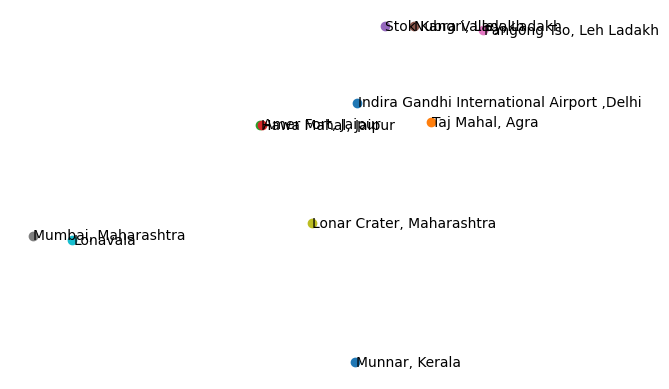

In [ ]:
def get_places_for_category(category):
    selected_places = []
    print(f"{category}:")
    for i, place in enumerate(place_categories[category]):
        print(f"{i + 1}. {place}")
    while True:
        selected_place_index = int(input("Enter the number of the place you are interested in (0 to finish): "))
        if selected_place_index == 0:
            break
        selected_places.append(place_categories[category][selected_place_index - 1])
    return selected_places

# User input: Choose the type of places they are interested in
selected_places = ['Indira Gandhi International Airport ,Delhi']
for category in place_categories:
    selected_places.extend(get_places_for_category(category))

print("Selected places of interest:", selected_places)

 #Make some positions (so we can plot this)
positions = dict((city, (position.loc[city, 'Longitude'], position.loc[city, 'Latitude'])) for city in selected_places)
for s in positions:
    p = positions[s]
    plt.plot(p[0], p[1], 'o')
    plt.text(p[0] + .01, p[1], s, horizontalalignment='left', verticalalignment='center')

plt.gca().axis('off');

# Get distance between selected cities
distances = dict(((s1, s2), distance.loc[s1, s2]) for s1 in selected_places for s2 in selected_places if s1 != s2)
K = 1  # Number of tourists

# Create the problem
prob = LpProblem("vehicle", LpMinimize)

# Indicator variable if site i is connected to site j in the tour
x = LpVariable.dicts('x', distances, 0, 1, LpBinary)

# Dummy vars to eliminate subtours
u = LpVariable.dicts('u', selected_places, 0, len(selected_places) - 1, LpInteger)

# The objective
cost = lpSum([x[(i, j)] * distances[(i, j)] for (i, j) in distances])
prob += cost

# Constraints
for k in selected_places:
    cap = 1 if k != 'Indira Gandhi International Airport ,Delhi' else K
    # Inbound connection
    prob += lpSum([x[(i, k)] for i in selected_places if (i, k) in x]) == cap
    # Outbound connection
    prob += lpSum([x[(k, i)] for i in selected_places if (k, i) in x]) == cap

# Subtour elimination
N = len(selected_places) / K
for i in selected_places:
    for j in selected_places:
        if i != j and (i != 'Indira Gandhi International Airport ,Delhi' and j != 'Indira Gandhi International Airport ,Delhi') and (i, j) in x:
            prob += u[i] - u[j] <= (N) * (1 - x[(i, j)]) - 1

%time prob.solve()
# prob.solve(GLPK_CMD(options=['--simplex']))
print(LpStatus[prob.status])

non_zero_edges = [e for e in x if value(x[e]) != 0]


def get_next_site(parent):
    '''helper function to get the next edge'''
    edges = [e for e in non_zero_edges if e[0] == parent]
    for e in edges:
        non_zero_edges.remove(e)
    return edges


tours = get_next_site('Indira Gandhi International Airport ,Delhi')
tours = [[e] for e in tours]

for t in tours:
    while t[-1][1] != 'Indira Gandhi International Airport ,Delhi':
        t.append(get_next_site(t[-1][1])[-1])

print("Personalized routes for tourists:")
for t in tours:
    print(' -> '.join([a for a, b in t] + ['Indira Gandhi International Airport ,Delhi']))


Personalized routes for tourists:
Indira Gandhi International Airport ,Delhi -> Stok Kangri, Ladakh -> Nubra Valley, Ladakh -> Pangong Tso, Leh Ladakh -> Taj Mahal, Agra -> Lonar Crater, Maharashtra -> Munnar, Kerala -> Lonavala -> Mumbai, Maharashtra -> Hawa Mahal, Jaipur  -> Amer Fort, Jaipur -> Indira Gandhi International Airport ,Delhi


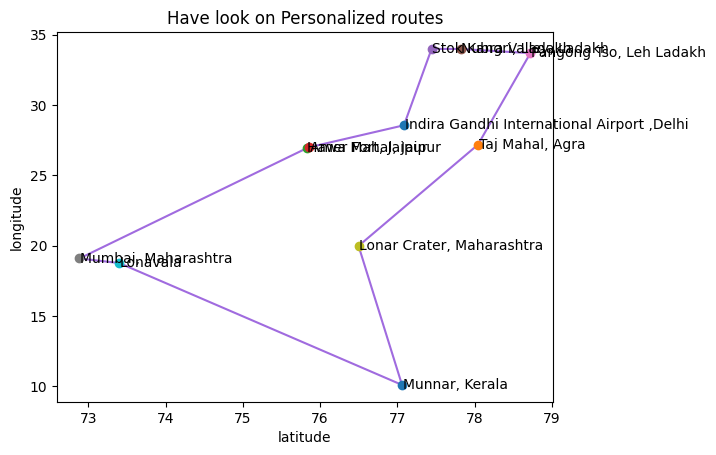

Total distance: 5621.528204206291 (km)


In [ ]:
print("Personalized routes for tourists:")
for t in tours:
    print(' -> '.join([a for a, b in t] + ['Indira Gandhi International Airport ,Delhi']))
#draw the tours
colors = [np.random.rand(3) for i in range(len(tours))]
for t,c in zip(tours,colors):
    for a,b in t:
        p1,p2 = positions[a], positions[b]
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]], color=c)

#draw the map again
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')

plt.title('%d '%K + 'people' if K > 1 else 'Have look on Personalized routes')
plt.xlabel('latitude')
plt.ylabel('longitude')
# plt.gca().axis('off')
plt.show()
print('Total distance:', value(prob.objective), '(km)')


# **Using Sweep Algorithm**

Tour: [0, 1, 3, 4, 6, 5, 45, 36, 18, 20, 10, 37, 28, 16, 41, 29, 43, 39, 44, 2, 25, 46, 31, 40, 21, 33, 9, 34, 19, 30, 27, 32, 47, 35, 42, 23, 12, 22, 17, 14, 24, 8, 26, 7, 11, 13, 15, 38, 0]
Total Distance: 34723.535606907004
Elapsed Time: 0.008039236068725586 seconds


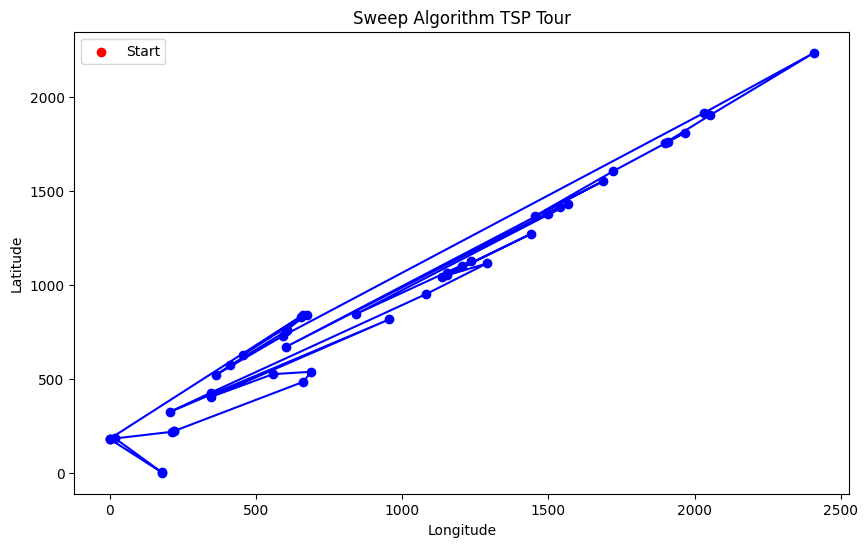

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Replace this with your actual distance matrix DataFrame
distance_matrix = distance
# Specify the starting city
starting_city_name = 'Indira Gandhi International Airport ,Delhi'
starting_city_index = distance_matrix.index.get_loc(starting_city_name)

# Start measuring execution time
start_time = time.time()

# Calculate polar angles and sort cities
angles = np.arctan2(distance_matrix.iloc[:, 1] - distance_matrix.iloc[starting_city_index, 1], distance_matrix.iloc[:, 0] - distance_matrix.iloc[starting_city_index, 0])
sorted_indices = np.argsort(angles)

# Create the tour
tour = [starting_city_index]
for index in sorted_indices:
    if index != starting_city_index:
        tour.append(index)
tour.append(starting_city_index)  # Add the starting city again to complete the loop

# Calculate the total tour distance
total_distance = sum(distance_matrix.iloc[tour[i], tour[i + 1]] for i in range(len(tour) - 1))
total_distance += distance_matrix.iloc[tour[-1], tour[0]]  # Add the distance back to the starting city

# End measuring execution time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print the tour, total distance, and elapsed time
print("Tour:", tour)
print("Total Distance:", total_distance)
print("Elapsed Time:", elapsed_time, "seconds")

# Plot the tour
plt.figure(figsize=(10, 6))
plt.plot(distance_matrix.iloc[tour, 0], distance_matrix.iloc[tour, 1], marker='o', linestyle='-', color='b')
plt.scatter(distance_matrix.iloc[starting_city_index, 0], distance_matrix.iloc[starting_city_index, 1], color='r', label='Start')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sweep Algorithm TSP Tour')
plt.legend()
plt.show()


Available Sites:
1. Indira Gandhi International Airport ,Delhi
2. Taj Mahal, Agra
3. Taj Hotel,Maharashtra
4. Agra Fort, UP
5. Red Fort, Delhi
6. Hawa Mahal, Jaipur 
7. Amer Fort, Jaipur
8. Stok Kangri, Ladakh
9. Nubra Valley, Ladakh
10. Nohkalikai Falls, Cherrapunji
11. Nanda Devi, Uttarakhand
12. Kargil
13. Andaman And Nicobar Islands
14. Khajjiar, Himachal Pradesh
15. Himachal Pradesh
16. Dal Lake
17. Valley Of Flowers, Uttaranchal
18. Pangong Tso, Leh Ladakh
19. Ghats, Varanasi
20. Sand Dunes, Jaisalmer
21. Lake Pichola, Udaipur
22. Dudhsagar Falls, Goa
23. Agatti Island, Lakshadweep
24. Munnar, Kerala
25. Manali
26. Raigad
27. Ladakh
28. Tawang, Arunachal Pradesh
29. Uttrakhand
30. Chilka Lake, Odisha
31. Agumbe, Karnataka
32. Rann Of Kutch
33. Loktak Lake, Manipur
34. Caves, Meghalaya
35. Palolem Beach, Goa
36. Tamil Nadu
37. Bhedaghat, Madhya Pradesh
38. Lonar Crater, Maharashtra
39. Gulmarg, Jammu And Kashmir
40. Andhra Pradesh
41. Karnataka
42. Maharashtra
43. Chembra Peak, Wa

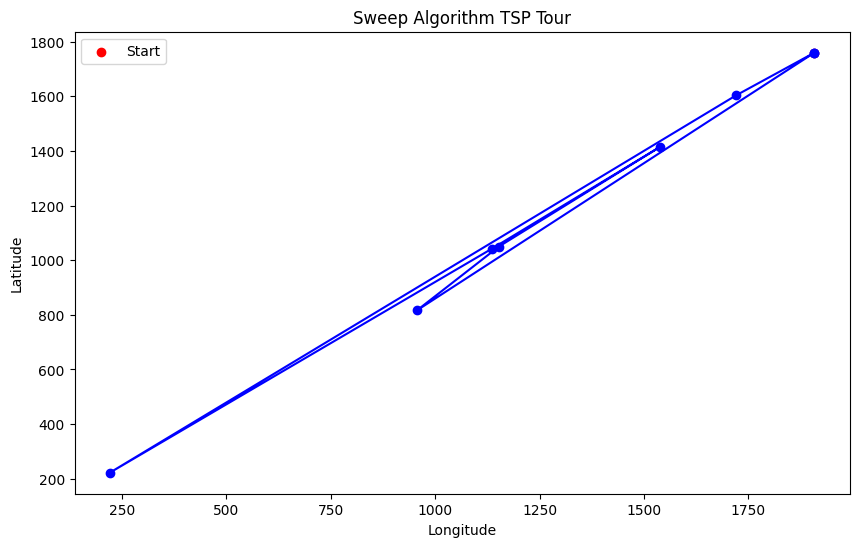

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Replace this with your actual distance matrix DataFrame
distance_matrix = distance

# List of sites
sites = [
    'Indira Gandhi International Airport ,Delhi',
    'Taj Mahal, Agra',
    'Taj Hotel,Maharashtra',
     'Agra Fort, UP',
    'Red Fort, Delhi',
    'Hawa Mahal, Jaipur ',
    'Amer Fort, Jaipur',
    'Stok Kangri, Ladakh',
    'Nubra Valley, Ladakh',
    'Nohkalikai Falls, Cherrapunji',
    'Nanda Devi, Uttarakhand',
    'Kargil',
    'Andaman And Nicobar Islands',
    'Khajjiar, Himachal Pradesh',
    'Himachal Pradesh',
    'Dal Lake',
    'Valley Of Flowers, Uttaranchal',
    'Pangong Tso, Leh Ladakh',
    'Ghats, Varanasi',
    'Sand Dunes, Jaisalmer',
    'Lake Pichola, Udaipur',
    'Dudhsagar Falls, Goa',
    'Agatti Island, Lakshadweep',
    'Munnar, Kerala',
    'Manali',
    'Raigad',
    'Ladakh',
    'Tawang, Arunachal Pradesh',
    'Uttrakhand',
    'Chilka Lake, Odisha',
    'Agumbe, Karnataka',
    'Rann Of Kutch',
    'Loktak Lake, Manipur',
    'Caves, Meghalaya',
    'Palolem Beach, Goa',
    'Tamil Nadu',
    'Bhedaghat, Madhya Pradesh',
    'Lonar Crater, Maharashtra',
    'Gulmarg, Jammu And Kashmir',
    'Andhra Pradesh',
    'Karnataka',
    'Maharashtra',
    'Chembra Peak, Wayanad, Kerala',
    'Lonavala',
    'Mumbai, Maharashtra',
    'Jaipur, Rajasthan',
    'Mahabaleshwar',
    'Ooty'
]

# Print available sites for user to choose
print("Available Sites:")
for i, site in enumerate(sites, 1):
    print(f"{i}. {site}")

# Get user input for the starting site
starting_site_input = int(input("Enter the number of the starting site: ")) - 1
starting_city_name = sites[starting_site_input]
starting_city_index = distance_matrix.index.get_loc(starting_city_name)

# Get user input for the other cities they want to visit
print("\nEnter the numbers of the other cities you want to visit (separated by spaces, 0 to finish):")
other_cities_input = input()
other_cities_indices = [int(index) - 1 for index in other_cities_input.split() if index != '0']
selected_cities_indices = [starting_site_input] + other_cities_indices
selected_cities_names = [sites[index] for index in selected_cities_indices]

# Start measuring execution time
start_time = time.time()

# Calculate polar angles and sort cities
angles = np.arctan2(distance_matrix.iloc[:, 1] - distance_matrix.iloc[starting_city_index, 1], distance_matrix.iloc[:, 0] - distance_matrix.iloc[starting_city_index, 0])
sorted_indices = np.argsort(angles)

# Create the tour
tour = [starting_city_index]
for index in sorted_indices:
    if index != starting_city_index and index in selected_cities_indices:
        tour.append(index)
tour.append(starting_city_index)  # Add the starting city again to complete the loop

# Calculate the total tour distance
total_distance = sum(distance_matrix.iloc[tour[i], tour[i + 1]] for i in range(len(tour) - 1))
total_distance += distance_matrix.iloc[tour[-1], tour[0]]  # Add the distance back to the starting city

# End measuring execution time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Print the tour with city names
tour_city_names = [sites[i] for i in tour]
print("\nSelected Cities:", selected_cities_names)
print("Tour:", tour)
print("Tour with City Names:", tour_city_names)
print("Total Distance:", total_distance)
print("Elapsed Time:", elapsed_time, "seconds")

# Plot the tour
plt.figure(figsize=(10, 6))
plt.plot(distance_matrix.iloc[tour, 0], distance_matrix.iloc[tour, 1], marker='o', linestyle='-', color='b')
plt.scatter(distance_matrix.iloc[starting_city_index, 0], distance_matrix.iloc[starting_city_index, 1], color='r', label='Start')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sweep Algorithm TSP Tour')
plt.legend()
plt.show()


Available Sites:
1. Indira Gandhi International Airport ,Delhi
2. Taj Mahal, Agra
3. Taj Hotel,Maharashtra
4. Agra Fort, UP
5. Red Fort, Delhi
6. Hawa Mahal, Jaipur 
7. Amer Fort, Jaipur
8. Stok Kangri, Ladakh
9. Nubra Valley, Ladakh
10. Nohkalikai Falls, Cherrapunji
11. Nanda Devi, Uttarakhand
12. Kargil
13. Andaman And Nicobar Islands
14. Khajjiar, Himachal Pradesh
15. Himachal Pradesh
16. Dal Lake
17. Valley Of Flowers, Uttaranchal
18. Pangong Tso, Leh Ladakh
19. Ghats, Varanasi
20. Sand Dunes, Jaisalmer
21. Lake Pichola, Udaipur
22. Dudhsagar Falls, Goa
23. Agatti Island, Lakshadweep
24. Munnar, Kerala
25. Manali
26. Raigad
27. Ladakh
28. Tawang, Arunachal Pradesh
29. Uttrakhand
30. Chilka Lake, Odisha
31. Agumbe, Karnataka
32. Rann Of Kutch
33. Loktak Lake, Manipur
34. Caves, Meghalaya
35. Palolem Beach, Goa
36. Tamil Nadu
37. Bhedaghat, Madhya Pradesh
38. Lonar Crater, Maharashtra
39. Gulmarg, Jammu And Kashmir
40. Andhra Pradesh
41. Karnataka
42. Maharashtra
43. Chembra Peak, Wa

<ipython-input-29-138a120667a6>:124: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", num_vehicles)


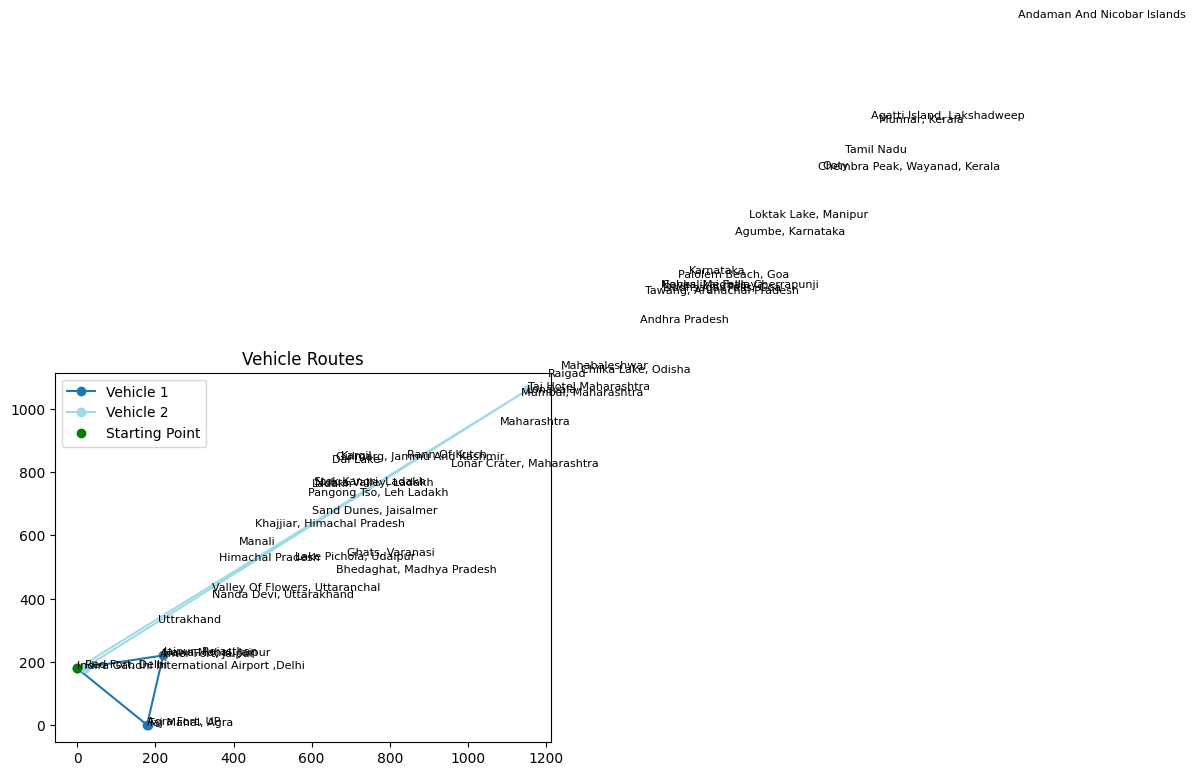

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Replace this with your actual distance matrix DataFrame
distance_matrix = distance

# List of sites
sites = [
    'Indira Gandhi International Airport ,Delhi',
    'Taj Mahal, Agra',
    'Taj Hotel,Maharashtra',
     'Agra Fort, UP',
    'Red Fort, Delhi',
    'Hawa Mahal, Jaipur ',
    'Amer Fort, Jaipur',
    'Stok Kangri, Ladakh',
    'Nubra Valley, Ladakh',
    'Nohkalikai Falls, Cherrapunji',
    'Nanda Devi, Uttarakhand',
    'Kargil',
    'Andaman And Nicobar Islands',
    'Khajjiar, Himachal Pradesh',
    'Himachal Pradesh',
    'Dal Lake',
    'Valley Of Flowers, Uttaranchal',
    'Pangong Tso, Leh Ladakh',
    'Ghats, Varanasi',
    'Sand Dunes, Jaisalmer',
    'Lake Pichola, Udaipur',
    'Dudhsagar Falls, Goa',
    'Agatti Island, Lakshadweep',
    'Munnar, Kerala',
    'Manali',
    'Raigad',
    'Ladakh',
    'Tawang, Arunachal Pradesh',
    'Uttrakhand',
    'Chilka Lake, Odisha',
    'Agumbe, Karnataka',
    'Rann Of Kutch',
    'Loktak Lake, Manipur',
    'Caves, Meghalaya',
    'Palolem Beach, Goa',
    'Tamil Nadu',
    'Bhedaghat, Madhya Pradesh',
    'Lonar Crater, Maharashtra',
    'Gulmarg, Jammu And Kashmir',
    'Andhra Pradesh',
    'Karnataka',
    'Maharashtra',
    'Chembra Peak, Wayanad, Kerala',
    'Lonavala',
    'Mumbai, Maharashtra',
    'Jaipur, Rajasthan',
    'Mahabaleshwar',
    'Ooty'
]

# Print available sites for user to choose
print("Available Sites:")
for i, site in enumerate(sites, 1):
    print(f"{i}. {site}")

# Get user input for the number of vehicles
num_vehicles = int(input("Enter the number of vehicles: "))

# Get user input for the starting site
starting_site_input = int(input("Enter the number of the starting site: ")) - 1
starting_city_name = sites[starting_site_input]
starting_city_index = distance_matrix.index.get_loc(starting_city_name)

# Get user input for the cities to visit across all vehicles
print("Enter the numbers of the cities to visit (separated by spaces, 0 to finish):")
cities_input = input()
selected_cities_indices = [int(index) - 1 for index in cities_input.split() if index != '0']

# Prepare the list of routes for each vehicle
vehicle_routes = [[] for _ in range(num_vehicles)]

# Distribute cities across vehicles
for i, city_index in enumerate(selected_cities_indices):
    vehicle_routes[i % num_vehicles].append(city_index)

# Start measuring execution time
start_time = time.time()

# Calculate tours for each vehicle
all_tours = []
for vehicle_route in vehicle_routes:
    # Add the starting and ending points to the route
    tour = [starting_city_index] + vehicle_route + [starting_city_index]
    all_tours.append(tour)

# End measuring execution time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Calculate total distance for each vehicle's route
total_distances = []
for tour in all_tours:
    total_distance = 0
    for i in range(len(tour) - 1):
        total_distance += distance_matrix.iloc[tour[i], tour[i + 1]]
    total_distances.append(total_distance)

# Print personalized routes and total distances for each vehicle
for i, tour in enumerate(all_tours):
    vehicle_name = starting_city_name
    vehicle_tour_city_names = [sites[index] for index in tour]
    print(f"\nRoute for Vehicle {i + 1} (Starting from {vehicle_name}):")
    print("Tour:", tour)
    print("Tour with City Names:", vehicle_tour_city_names)
    print("Total Distance:", total_distances[i])


# Print elapsed time
print("\nElapsed Time:", elapsed_time, "seconds")

# Plotting the routes with different colors
colors = plt.cm.get_cmap("tab20", num_vehicles)
for i, tour in enumerate(all_tours):
    x = [distance_matrix.iloc[index, 0] for index in tour]
    y = [distance_matrix.iloc[index, 1] for index in tour]
    plt.plot(x, y, marker='o', color=colors(i), label=f"Vehicle {i + 1}")

# Add labels to the plotted points
for i, site in enumerate(sites):
    plt.text(distance_matrix.iloc[i, 0], distance_matrix.iloc[i, 1], site, fontsize=8)

# Plot starting point
plt.plot(distance_matrix.iloc[starting_city_index, 0], distance_matrix.iloc[starting_city_index, 1], 'go', label="Starting Point")

# Add legend and title
plt.legend()
plt.title("Vehicle Routes")

# Show the plot
plt.show()

In [ ]:
!pip install Gradio

In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


# Function to find routes and return data for Gradio output
def find_routes(num_vehicles, starting_city, cities_to_visit):
    # Get the index of the starting city
    starting_city_index = sites.index(starting_city)

    # Convert cities to visit to indices
    selected_cities_indices = [sites.index(city) for city in cities_to_visit]

    # Prepare the list of routes for each vehicle
    vehicle_routes = [[] for _ in range(num_vehicles)]

    # Distribute cities across vehicles
    for i, city_index in enumerate(selected_cities_indices):
        vehicle_routes[i % num_vehicles].append(city_index)

    # Start measuring execution time
    start_time = time.time()

    # Calculate tours for each vehicle
    all_tours = []
    total_distances = []
    for vehicle_route in vehicle_routes:
        # Add the starting and ending points to the route
        tour = [starting_city_index] + vehicle_route + [starting_city_index]
        all_tours.append(tour)

        # Calculate the total distance for the tour
        total_distance = sum(distance_matrix.iloc[tour[i], tour[i+1]] for i in range(len(tour) - 1))
        total_distances.append(total_distance)

    # End measuring execution time
    end_time = time.time()

    # Calculate elapsed time
    elapsed_time = end_time - start_time

    # Prepare data for Gradio output
    output_data = []
    for i, tour in enumerate(all_tours):
        vehicle_name = starting_city
        vehicle_tour_city_names = [sites[index] for index in tour]
        total_distance = total_distances[i]
        output_data.append((f"Vehicle {i + 1}", vehicle_name, vehicle_tour_city_names, total_distance))

    output_text = "\n".join([f"Route for {vehicle}: {', '.join(city_names)}\nTotal Distance: {distance}" for vehicle, _, city_names, distance in output_data])

    return output_text, elapsed_time

# Create Gradio interface
num_vehicles_input = gr.inputs.Number(label="Number of Vehicles")
starting_city_input = gr.inputs.Dropdown(choices=sites, label="Starting City")
cities_to_visit_input = gr.inputs.CheckboxGroup(choices=sites, label="Cities to Visit")

outputs = gr.outputs.Textbox()

interface = gr.Interface(fn=find_routes, inputs=[num_vehicles_input, starting_city_input, cities_to_visit_input], outputs=outputs, live=True, capture_session=True)


In [ ]:
interface.launch()